In [1]:
#Student Name: Olaitan Oluwadare
#Course: Machine Learing
#Subject: 

In [2]:
#to perform linear regression
#to test, train and validate
#to read the csv file. To perform the tasks above we have to import some library as shown below

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [6]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [9]:
df = pd.read_csv('used_cars_data-1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'used_cars_data-1.csv'

In [ ]:
df.head()

In [7]:
df.value_counts()

S.No.  Name                                             Location   Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage     Engine   Power       Seats  New_Price  Price
0      Maruti Wagon R LXI CNG                           Mumbai     2010  72000              CNG        Manual        First       26.6 km/kg  998 CC   58.16 bhp   5.0    5.51       1.75     1
4028   Mercedes-Benz CLA 200 CGI Sport                  Delhi      2016  40000              Petrol     Automatic     First       15.04 kmpl  1991 CC  183 bhp     5.0    41.02      24.50    1
4026   Maruti Alto K10 VXI                              Jaipur     2016  51264              Petrol     Manual        First       24.07 kmpl  998 CC   67.1 bhp    5.0    4.24       3.20     1
4025   Maruti Swift Ldi BSIII                           Chennai    2010  84072              Diesel     Manual        First       17.8 kmpl   1248 CC  75 bhp      5.0    7.88       3.45     1
4024   Renault Duster 110PS Diesel RxZ            

In [8]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [28]:
list(df)

['S.No.',
 'Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [9]:
df.shape

(7253, 14)

In [10]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


In [11]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [12]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

Cleaning the data. Cleaning the Name column

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [14]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [15]:
for i in df.columns:
    print(i.upper())
    print(df[i].value_counts())
    print('*'*30)

S.NO.
0       1
4818    1
4844    1
4843    1
4842    1
       ..
2413    1
2412    1
2411    1
2410    1
7252    1
Name: S.No., Length: 7253, dtype: int64
******************************
NAME
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
******************************
LOCATION
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
*****************************

In [16]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

# this is where you dropped the missing values in engine, power and seats. 

In [17]:
df.dropna(subset = ["Engine", "Power", "Seats"], inplace = True)

In [18]:
df[df["Mileage"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75


## you wish to remove the km/kg in milegae

- what you did

In [19]:
New_mil = []
for i in df.Mileage:
    if str().endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        New_mil.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        New_mil.append(float(i))
    else:
        New_mil.append

## how i will do it

In [38]:
New_mil = []
for i in df.Mileage.values: # for all the values in mileage column
    if isinstance(i, float): #np.nan is of type float, so if i is type float, 
        New_mil.append(np.nan) #append nan to the list
    elif i.endswith('km/kg'): # if any value endswith 'km/kg'
        i = float(i.replace('km/kg', "")) #replace 'km/kg' with nothing hence the empty string
        New_mil.append(i) #append i to New_mil
    elif i.endswith('kmpl'):
        i = float(i.replace('kmpl', ""))
        New_mil.append(i)
    else:
        New_mil.append(i)
        
#create a new column and append all the values in New_mil to it        
df['New_Mileage'] = [item for item in New_mil]
df.New_Mileage

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: New_Mileage, Length: 7075, dtype: float64

In [41]:
df['Engine'] = df['Engine'].str.replace('CC', '') #all these worked easily kudos
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].str.replace('bhp', '')
df['Power'] = df['Power'].astype(float)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7075 non-null   int64  
 1   Name               7075 non-null   object 
 2   Location           7075 non-null   object 
 3   Year               7075 non-null   int64  
 4   Kilometers_Driven  7075 non-null   int64  
 5   Fuel_Type          7075 non-null   object 
 6   Transmission       7075 non-null   object 
 7   Owner_Type         7075 non-null   object 
 8   Mileage            7073 non-null   object 
 9   Engine             7075 non-null   float64
 10  Power              7075 non-null   float64
 11  Seats              7075 non-null   float64
 12  New_Price          7075 non-null   float64
 13  Price              5874 non-null   float64
 14  New_Mileage        7073 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 884.4+ KB


## there is no need for this code below

In [ ]:
Power_bhp = []
for i in df["Engine"]:
    if str(i).endswith('CC'):
        i = i[:.4]
        i = float(i)
        Power_bhp.append(i)

In [40]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7075.0,NaN,NaN,NaN,3628.971449,2092.464094,0.0,1814.5,3632.0,5438.0,7252.0
Name,7075,1969,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7075,11,Mumbai,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7075.0,NaN,NaN,NaN,2013.480707,3.151399,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,7075.0,NaN,NaN,NaN,58254.150954,85227.629657,171.0,33467.5,53000.0,72566.0,6500000.0
Fuel_Type,7075,5,Diesel,3783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7075,2,Manual,5048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7075,4,First,5842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7073,448,18.9 kmpl,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7075.0,NaN,NaN,NaN,1620.812721,596.104268,72.0,1198.0,1495.0,1984.0,5998.0


In [41]:
df['Name']

0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7075, dtype: object

In [42]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Toyota Fortuner 3.0 Diesel              35
                                        ..
BMW 7 Series 2007-2012 750Li             1
Hyundai EON 1.0 Magna Plus Option O      1
Hyundai i20 1.4 Magna ABS                1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 1969, dtype: int64

In [43]:
df['Name'].unique

<bound method Series.unique of 0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7075, dtype: object>

Cleaning the Location column

In [44]:
df['Location']

0           Mumbai
1             Pune
2          Chennai
3          Chennai
4       Coimbatore
           ...    
7248     Hyderabad
7249        Mumbai
7250       Kolkata
7251          Pune
7252         Kochi
Name: Location, Length: 7075, dtype: object

Cleaning the Fuel_Type Column

In [45]:
df['Fuel_Type']

0          CNG
1       Diesel
2       Petrol
3       Diesel
4       Diesel
         ...  
7248    Diesel
7249    Petrol
7250    Diesel
7251    Petrol
7252    Diesel
Name: Fuel_Type, Length: 7075, dtype: object

In [46]:
df['Fuel_Type'].unique

<bound method Series.unique of 0          CNG
1       Diesel
2       Petrol
3       Diesel
4       Diesel
         ...  
7248    Diesel
7249    Petrol
7250    Diesel
7251    Petrol
7252    Diesel
Name: Fuel_Type, Length: 7075, dtype: object>

In [47]:
df['Fuel_Type'].value_counts()

Diesel      3783
Petrol      3217
CNG           61
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

Cleaning the New_Price column

In [48]:
df['New_Price'].value_counts()

7.880     623
10.250    622
13.580    387
18.865    234
10.150    208
         ... 
41.980      1
47.160      1
6.230       1
5.350       1
18.160      1
Name: New_Price, Length: 643, dtype: int64

In [49]:
df['New_Price'].unique

<bound method Series.unique of 0        5.51
1       16.06
2        8.61
3       11.27
4       53.14
        ...  
7248    13.23
7249    10.15
7250     9.47
7251    10.15
7252    86.97
Name: New_Price, Length: 7075, dtype: float64>

In [50]:
df['New_Price']

0        5.51
1       16.06
2        8.61
3       11.27
4       53.14
        ...  
7248    13.23
7249    10.15
7250     9.47
7251    10.15
7252    86.97
Name: New_Price, Length: 7075, dtype: float64

Cleaning the Kilometers_Driven column

In [51]:
df['Kilometers_Driven'].unique

<bound method Series.unique of 0       72000
1       41000
2       46000
3       87000
4       40670
        ...  
7248    89411
7249    59000
7250    28000
7251    52262
7252    72443
Name: Kilometers_Driven, Length: 7075, dtype: int64>

In [52]:
df['Kilometers_Driven']

0       72000
1       41000
2       46000
3       87000
4       40670
        ...  
7248    89411
7249    59000
7250    28000
7251    52262
7252    72443
Name: Kilometers_Driven, Length: 7075, dtype: int64

Some Visualization

In [53]:
essentials = list(df)

In [54]:
essentials

['S.No.',
 'Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

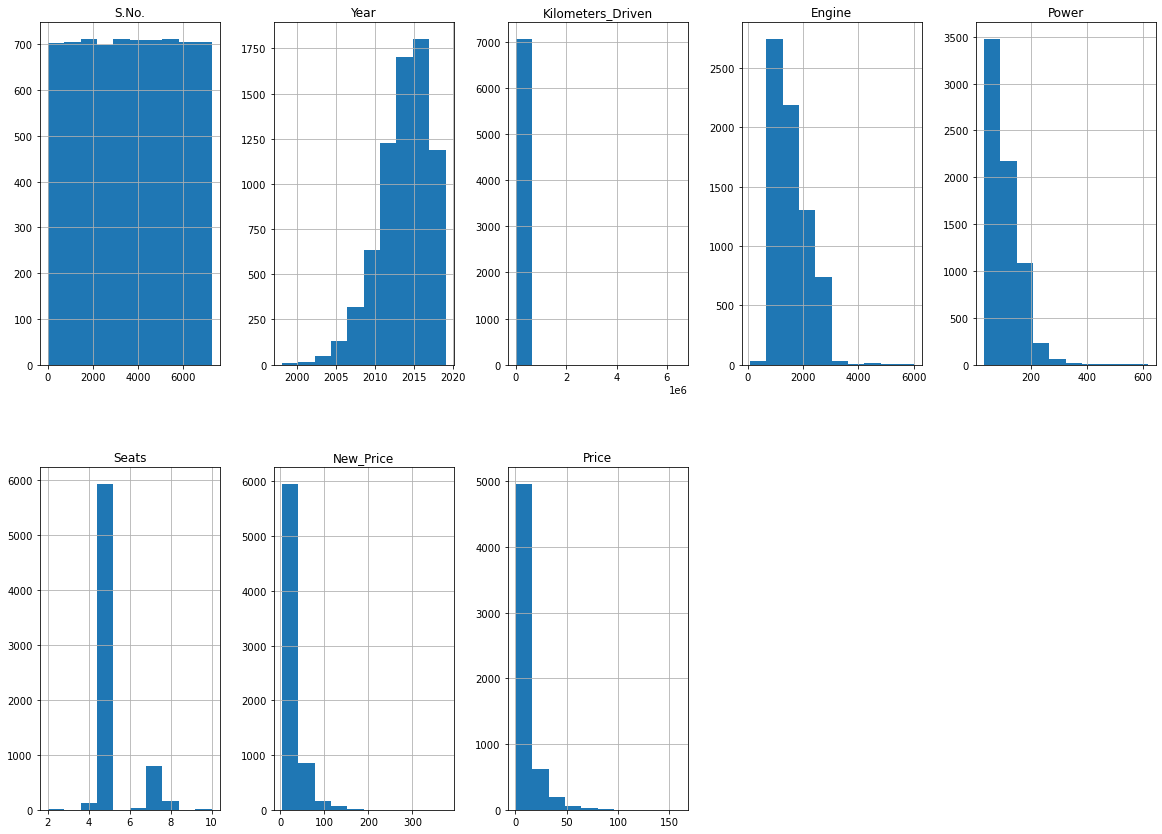

In [55]:
df[essentials].hist(stacked = False, bins = 10, figsize = (20,80), layout = (10,5))
plt.show()

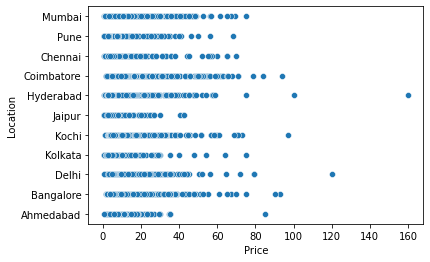

In [56]:
sns.scatterplot(df, x="Price", y = "Location")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

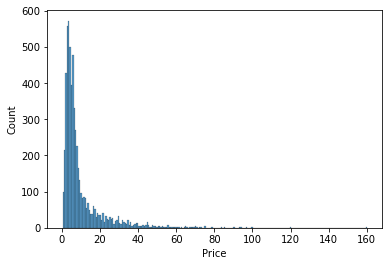

In [57]:
sns.histplot(df, x = "Price")

<AxesSubplot:xlabel='Price', ylabel='New_Price'>

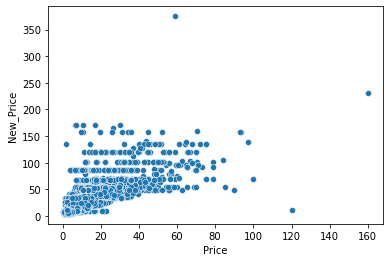

In [58]:
sns.scatterplot(df, x= "Price", y = "New_Price" )

Text(0.5, 1.0, 'Price')

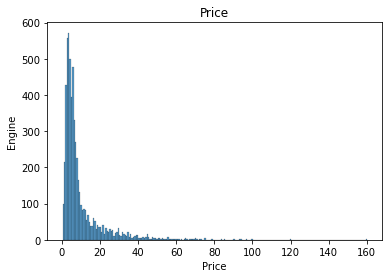

In [59]:
sns.histplot(data =df, x = "Price")
plt.ylabel("Engine")
plt.title("Price")

<AxesSubplot:xlabel='Price', ylabel='Count'>

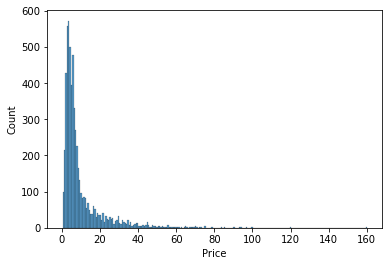

In [60]:

sns.histplot(data =df, x = "Price")

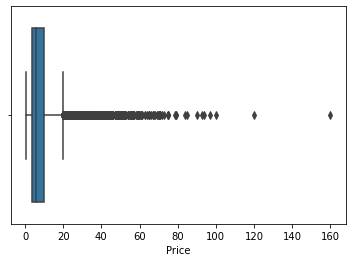

In [61]:
sns.boxplot(data = df, x = "Price");

plt.savefig("Price.png")

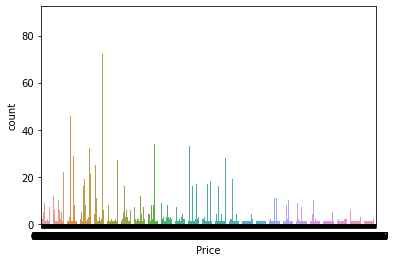

In [62]:
sns.countplot(data = df, x = "Price");

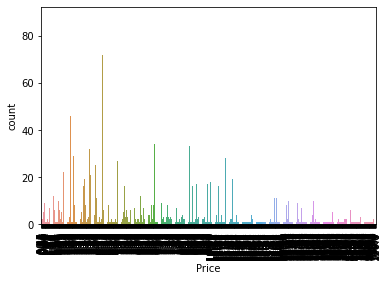

In [63]:
sns.countplot(data = df, x = "Price")
plt.xticks(rotation = 90);

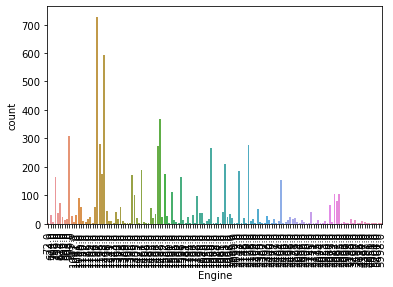

In [64]:
sns.countplot(data = df, x = "Engine")
plt.xticks(rotation = 90);

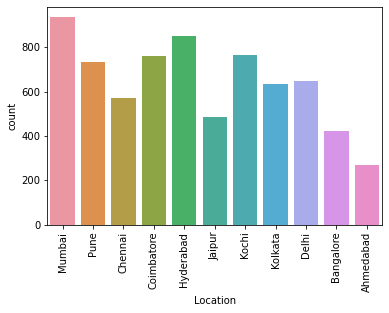

In [65]:
sns.countplot(data = df, x = "Location")
plt.xticks(rotation = 90);

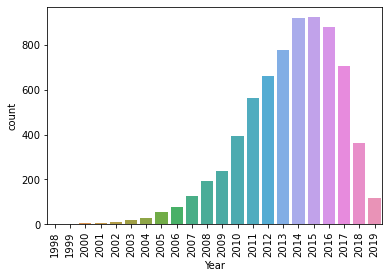

In [66]:
sns.countplot(data = df, x = "Year")
plt.xticks(rotation = 90);

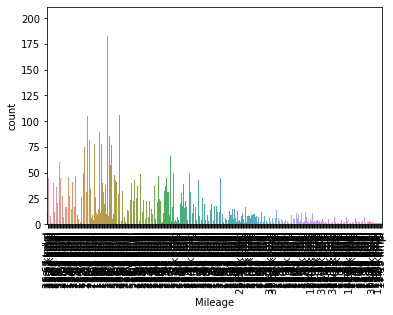

In [67]:
sns.countplot(data = df, x = "Mileage")
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='Price', ylabel='Year'>

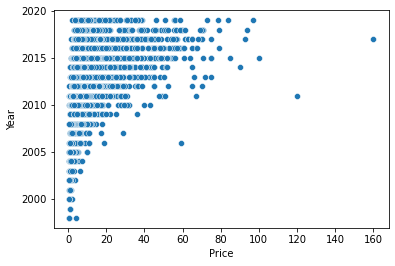

In [68]:
sns.scatterplot(df, x="Price", y = "Year")

<AxesSubplot:xlabel='Price', ylabel='Location'>

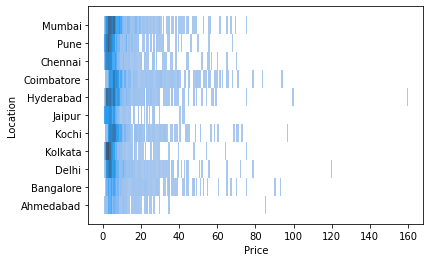

In [69]:
sns.histplot(df, x="Price", y = "Location")

# you still have missing values, you cannot start building a model until you have filled or dropped all missing values

In [70]:
x = df.drop(['Price', 'Location'], axis =1)
y = df['Price']

In [71]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598.0,103.60,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197.0,103.60,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197.0,103.60,5.0,10.15,NaN


In [72]:
df['Kilometers_Driven'].value_counts()

60000     93
45000     85
65000     83
70000     72
50000     72
          ..
20773      1
66355      1
115800     1
41125      1
72443      1
Name: Kilometers_Driven, Length: 3593, dtype: int64

In [73]:
x

,S.No.,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,5.51
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,16.06
2,2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61
3,3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,11.27
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,53.14
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,2011,89411,Diesel,Manual,First,20.54 kmpl,1598.0,103.60,5.0,13.23
7249,7249,Volkswagen Polo GT TSI,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197.0,103.60,5.0,10.15
7250,7250,Nissan Micra Diesel XV,2012,28000,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,9.47
7251,7251,Volkswagen Polo GT TSI,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197.0,103.60,5.0,10.15


In [74]:
x.isnull().sum()

S.No.                0
Name                 0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

In [75]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
7248      NaN
7249      NaN
7250      NaN
7251      NaN
7252      NaN
Name: Price, Length: 7075, dtype: float64

In [76]:
y.unique()

array([ 1.75, 12.5 ,  4.5 , ..., 17.56,  7.43,   nan])

In [77]:
y.describe()

count    5874.000000
mean        9.605032
std        11.247700
min         0.440000
25%         3.520000
50%         5.750000
75%        10.037500
max       160.000000
Name: Price, dtype: float64

In [43]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1201
New_Mileage             2
dtype: int64

## the code below will return an empty dataframe for path.
## you can not use inplace=True and be saving into a new variable at the same time

In [44]:
path = df.dropna(subset = ["Engine", "Power", "Seats", "Price"], inplace = True)

In [46]:
#path will be an empty dataset
path

In [ ]:
## do it this way
#df.dropna(subset = ["Engine", "Power", "Seats", "Price"], inplace = True)

#or 

#path = df.dropna(subset = ["Engine", "Power", "Seats", "Price"])

In [80]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,53.14,17.74


In [81]:
df.size

82236

# i do not understand what you are trying to achieve here

In [82]:
df["Engine", "Power", "Seats", "Price"].replace(path, inplace=True)

KeyError: ('Engine', 'Power', 'Seats', 'Price')

# you want to fill the missing values in engine, power and seats with the median of each column.

## the only error
- use double square brackets df[["Engine","Power", "Seats"]], you only used one.


In [83]:
df["Engine","Power", "Seats"].fillna(df["Engine","Power", "Seats"].median(), inplace = True)

KeyError: ('Engine', 'Power', 'Seats')

# this is how to write it. notice the double square brackets.
## however, you had dropped the missing values before. why are you trying to drop it again?

In [47]:
df[["Engine","Power", "Seats"]].fillna(df[["Engine","Power", "Seats"]].median(), inplace = True)

In [48]:
df[["Engine","Power", "Seats"]].isnull().sum()

Engine    0
Power     0
Seats     0
dtype: int64

In [84]:
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 0)

In [85]:
x_train

,S.No.,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1708,1708,Audi Q3 35 TDI Quattro Premium Plus,2016,58661,Diesel,Automatic,First,15.17 kmpl,1968.0,181.00,5.0,48.640
4980,4980,Mahindra TUV 300 2015-2019 T8,2017,56380,Diesel,Manual,First,18.49 kmpl,1493.0,100.00,7.0,18.865
2687,2687,Mercedes-Benz E-Class 2015-2017 E250 Edition E,2016,39500,Diesel,Automatic,First,15.0 kmpl,2143.0,204.00,5.0,86.970
5976,5976,Maruti Wagon R LX BSIII,2006,65771,Petrol,Manual,Second,17.3 kmpl,1061.0,64.00,5.0,5.510
6192,6192,Maruti Alto LXi,2012,64631,Petrol,Manual,First,19.7 kmpl,796.0,46.30,5.0,4.360
...,...,...,...,...,...,...,...,...,...,...,...,...
5057,5057,Volkswagen Polo 1.2 MPI Comfortline,2013,39000,Petrol,Manual,First,16.47 kmpl,1198.0,74.00,5.0,10.150
3351,3351,Hyundai i20 1.4 CRDi Sportz,2014,32720,Diesel,Manual,First,23.0 kmpl,1396.0,90.00,5.0,10.250
1699,1699,Ford Endeavour 4x2 XLT Limited Edition,2007,90000,Diesel,Manual,Fourth & Above,10.9 kmpl,2499.0,143.00,7.0,35.290
2683,2683,Maruti Celerio ZXI Optional,2017,26400,Petrol,Manual,First,23.1 kmpl,998.0,67.04,5.0,5.870


In [86]:
y_train

,S.No.,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1122,1122,Honda City i VTEC CVT VX,2016,58197,Petrol,Automatic,First,18.0 kmpl,1497.0,117.30,5.0,13.580
6370,6370,Maruti Vitara Brezza VDi Option,2016,66000,Diesel,Manual,First,24.3 kmpl,1248.0,88.50,5.0,11.120
4858,4858,Audi A4 35 TDI Technology,2017,14000,Diesel,Automatic,First,18.25 kmpl,1968.0,187.74,5.0,55.610
905,905,Maruti Swift Dzire Vdi BSIV,2008,91000,Diesel,Manual,Second,19.3 kmpl,1248.0,73.90,5.0,7.880
4494,4494,Fiat Grande Punto 1.4 Emotion,2015,44846,Petrol,Manual,Second,14.6 kmpl,1368.0,88.70,5.0,9.075
...,...,...,...,...,...,...,...,...,...,...,...,...
5069,5069,Volkswagen Polo 1.2 MPI Highline,2015,58134,Petrol,Manual,First,16.47 kmpl,1198.0,74.00,5.0,10.150
3423,3423,Maruti Swift ZXI,2016,34000,Petrol,Manual,First,20.4 kmpl,1197.0,81.80,5.0,7.880
1679,1679,Volkswagen Polo GTI,2015,60007,Petrol,Automatic,First,17.21 kmpl,1798.0,189.00,4.0,10.150
2908,2908,Maruti Swift Ldi BSIII,2007,140000,Diesel,Manual,Second,17.8 kmpl,1248.0,75.00,5.0,7.880


In [87]:
list(df)

['S.No.',
 'Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [88]:
df["Transmission"]

0          Manual
1          Manual
2          Manual
3          Manual
4       Automatic
          ...    
6014       Manual
6015       Manual
6016       Manual
6017       Manual
6018       Manual
Name: Transmission, Length: 5874, dtype: object

## some of these columns do not have missing values

In [89]:
df.dropna(subset = ["Engine", "Power", "Seats", "Mileage", "Fuel_Type", "Transmission", "Location"], inplace = True)

In [90]:
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
SimpleImputer()
x = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(x))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


# age was never in the column name

In [49]:
df[df["Age"].isnull()]

KeyError: 'Age'

# you can not train your algoritm except these missing values are dropped or filled

In [92]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

ValueError: could not convert string to float: 'Audi Q3 35 TDI Quattro Premium Plus'

In [93]:
plt.figure(dpi=200)
df.drop(df["Price"], axis=1, inplace = True)
sns.heatmap(df.corr(), annot=True

SyntaxError: unexpected EOF while parsing (<ipython-input-93-cae8cdbc18f8>, line 3)

# how to drop the missing values

In [50]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
New_Mileage          2
dtype: int64

### i will drop Mileage column since new_mileage came from it and then drop the missing vaues in New_milage

In [51]:
df = df.drop(['Mileage'], axis = 1)

In [55]:
df.dropna(subset=['New_Mileage'],inplace=True )


In [56]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
New_Mileage          0
dtype: int64

# it is at this point you can start building your model by splitting to features and target. scaling the data etc

In [ ]:
df.boxplot(figsize = (15,10), fontsize =15, rot = 30)
plt.show()

In [ ]:
for i, val in enumerate(df["Price"]):
    try:
        age = float(val)
        df.at[i, "Price"] = age
        
    except Exception as error:
        df.at[i, "Price"] = np.nan
        print("Error", error, "on line", i)

In [ ]:
labelled_barplot(df, "Transmission", perc=True)

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(y='Log_Price', x="Power_bhp", data =df)
plt.xticks(rotation=30)
plt.show()

In [ ]:
df.drop('Price', axis=1, inplace=True)
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=1, fmt=".2f", cmap="cyan")
plt.show()

In [ ]:
def outlier_treatlower_clip = 

lower - 1.5 *iqr
upper_clip = upper + 1.5 *iqr

df[col] = np.clip(df[col], lower_clip, upper_clip)
return df

def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = outlier_treat(df, c)
    
    return df    

In [ ]:
def treat_outliers_all(df, num_cols):
    lower = df[col].quantile(0.25)
    upper = df[col].quantile(0.75)
    iqr = upper -lower
    
    lower_clip = lower - 1.5 + iqr
    upper_clip = upper + 1.5 * iqr
    
    df[col] = np.clip(df[col], lower_clip, upper_clip)
    return df
    
    
def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = outlier_treat(df, c)
    
    return df    
    

In [ ]:
df = treat_outliers_all(df, num_cols)
df

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
lin_reg4 = LinearRegression()

sfs = SequentialFeatureSelector (estimator = lin_reg4, k_features = 10, n_jobs = -1, verbose = 2)

sfs.fit(x_train_sc, y_train)

In [ ]:
x = df.drop(['Price', ])

In [ ]:
from sklearn.ensemble import ExtraTreeRegressor, BaggingRegressor, RandomForestRegressor

In [ ]:
X

In [ ]:
pd.get_dummies(df)

In [ ]:
df["Engine_CC"] = Power_bhp
df["Engine_CC"]

In [ ]:
str(df['Mileage'].fillna(str(df['Mileage'].median(), inplace = True))).strip("\"")